# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind_from_stats
from numpy.random import seed
import seaborn as sns

sns.set()
sns.set_style({'axes.grid' : False})

medical = pd.read_csv('data/insurance2.csv')

##### To turn grid settings off in seaborn: 

- Go to this [SO Answer](https://stackoverflow.com/questions/26868304/how-to-get-rid-of-grid-lines-when-plotting-with-seaborn-pandas-with-secondary)
- Refer [this site](http://gree2.github.io/python/2015/05/05/python-seaborn-tutorial-controlling-figure-aesthetics) as well (for aesthetics cheatkey)

##### Markdown cheatsheet
- [Click Here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The sample does not follow normal distribution, so although the computed statistics is not wrong, we may need to interpret it with a grain of salt since it will not be the best unbiased point estimate of the population. We would need to introduce confidence intervals to make correct assumptions about the uncertainty.

See this [post](https://www.researchgate.net/post/Statistics_for_non-normally_distributed_data)

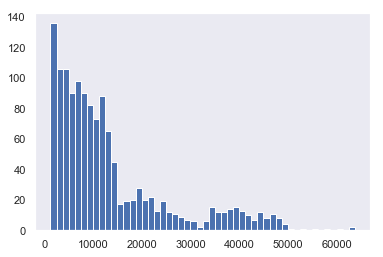

In [4]:
plt.hist(medical.charges, bins=50) # bin number represents the number of bins
plt.show()


In [5]:
sample_mean = np.mean(medical.charges)
sample_std = np.std(medical.charges, ddof=1)
(sample_mean, sample_std)

# medical.charges.std()


(13270.422265141257, 12110.011236694001)

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The data is right skewed and is clearly not normally distributed. However, we can correctly justify our usage of t-statistic and z-statistic because the data sufficiently meets the asusmptions for CLT (Central Limit Theorem) 

1. The question already states that the data represents a _random sample of charges_. This satisfies the 'Randomization Condition'.
2. Individual medical charges are _independent_ of each other since they were randomly sampled. Also in the practical world, individual medical charges are independent events. 
3. Sample size is over 1300. The sample is not normally distributed but the big sample size makes up for the non-normality. Thus 'Sample Size Assumption' is met. 


Reference: [Central Limit Theorem Assumptions and Conditions](https://cnx.org/contents/7mUmR30Q@1/Central-Limit-Theorem-Assumptions-and-Conditions)

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ One-sided interval would be more appropriate since the nature of administrator's concern is directional. The null hypothesis $H_0$ would be that we do not see a change in the sample mean (13270.422265141257). Moreover we would be calculating the left tail critical value since we want to know if the average charge has fallen below $12000

In [6]:
# Calculating Critical Value 
# We're testing a value (12000) below the mean - thus p would be 0.05
p = 0.05
sample_size = medical.shape[0]
df = sample_size - 1  # degrees of freedom 

t_critical = t.ppf(p, df)
print("The critical t value for 95% confidence interval is: {} ".format(t_critical))

The critical t value for 95% confidence interval is: -1.6459941145571324 


In [7]:
# Margin of Error:
# moe = critical_value * standard_error

standard_error = sample_std / (np.sqrt(sample_size))
margin = t_critical *  standard_error
print("The margin of error is: {} ".format(margin))

The margin of error is: -544.9350813250255 


In [8]:
sample_mean
interval_lower_bound = sample_mean + margin 
print("Sample mean is: ${}, and the corresponding value for the t-statistic of -1.645 is : ${}".format(sample_mean, interval_lower_bound))
print("\n")
print("Therefore, we can be confident 95% of the time that the true population mean lies above the value of ${}".format(interval_lower_bound))
print("\n")
print("In conclusion, the administrator shouldn't be too concerned about decreasing medical charges. (But maybe us patients do?! haha)")


Sample mean is: $13270.422265141257, and the corresponding value for the t-statistic of -1.645 is : $12725.48718381623


Therefore, we can be confident 95% of the time that the true population mean lies above the value of $12725.48718381623


In conclusion, the administrator shouldn't be too concerned about decreasing medical charges. (But maybe us patients do?! haha)


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ Assumption: Variances of the two samples (groups) are homogenous

$H_0$: there is NO difference in the amount charged between people with insurance and with people without  <br>
$H_\alpha$: there IS a difference in the amount charged between the two groups


Reference: [Statistics How To](https://www.statisticshowto.datasciencecentral.com/homoscedasticity/),
[Ohio University Study Guide pdf](https://www.ohio.edu/plantbio/staff/mccarthy/quantmet/lectures/ttest.pdf)

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

##### Note to SELF (since I always tend to forget this...)

- [How to get first row value of a given column](https://stackoverflow.com/questions/25254016/pandas-get-first-row-value-of-a-given-column)
- [List of Agg functions for groupby](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

### Manual Approach

In [9]:
# groupby insurance claim and find the row with(1) or without(0) insurance claims
grouped = medical.groupby('insuranceclaim')

# # # Calculating different statistics: 

# Calculate n (sample size) 
# (get the first value of the Series) 
n0 = grouped.count().loc[0][0]
n1 = grouped.count().loc[1][0]

# Calculate the mean
x0 = grouped.mean().loc[0,'charges']
x1 = grouped.mean().loc[1,'charges']


# Calculate the standard deviation
s0 = grouped.std().loc[0,'charges']
s1 = grouped.std().loc[1,'charges']

# x0 - x1 
# x1

\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}


\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

In [10]:
# Calculate pooled standard deviation 
# Formula (given above)

std_pool = np.sqrt(((n0-1) * (s0 ** 2) + (n1-1) * (s1 ** 2)) / (n0 + n1 - 2))

std_pool


11520.034268775256

In [11]:
# Calculate t-statistic
# Formula (given above)

In [12]:
t_critical = (x0 - x1) / ((std_pool) * np.sqrt((1/n0) + (1/n1)))
t_critical

-11.89329903087671

##### Difference between cdf and ppf

1.CDF (Cumulative Distribution Function):
  - argument --> critical value
  - output --> p - value
  
2.PPF (Percentile Point Function):
  - argument --> p - value (probability) 
  - output --> critical value



__CDF and PPF have inverse relationships__ 

[Nice Summary](http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/en_Tanagra_Calcul_P_Value.pdf) on how to use scipy.stats regarding cdf and ppf 

In [13]:
# # Example Case
# Cumulative Probability of the area under the curve left of critical value = 1 
p_val_ex = t.cdf(1, n0+n1-2)
p_val_ex

# Critical Value given the cumulative probability = 0.95 for one-tailed test
t_critical_ex = t.ppf(0.95, n0+n1-2)
t_critical_ex


1.6459949688112576

In [14]:
# Calculating the p-value using the t-statistic from above
p_value = t.cdf(t_critical, n0+n1-2)
p_value
print("P-value given that the null hypothesis is true is: {}".format(p_value))

P-value given that the null hypothesis is true is: 2.230615115810486e-31


### Using scipy.stats function

T-test for two independent samples (equal_var = True by default)

References: 
- [ttest from samples](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)
- [ttest from descriptive stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html#scipy.stats.ttest_ind_from_stats)

In [15]:
# ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True)

t_critical_stats, p_value_stats = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print("Using the scipy.stats function gives us t critical value of: {} and P-value of {}".format(t_critical_stats, p_value_stats))


Using the scipy.stats function gives us t critical value of: -11.893299030876712 and P-value of 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__ If two groups have unequal variances (heteroscedastic), then perform Welch's t-test

In [16]:
t_critical_welch, p_value_welch = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1, equal_var=False)

print("Using the scipy.stats function to conduct t-test for two independent samples\
 with unequal variances gives us t critical value of: {} and P-value of {}".format(t_critical_welch, p_value_welch))


Using the scipy.stats function to conduct t-test for two independent samples with unequal variances gives us t critical value of: -13.298031957975647 and P-value of 1.1105103216309438e-37


__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I couldn't find any documentation for doing z-tests in scipy.stats but it looks like __statsmodels__ has the relevant api call for conducting z-tests [Reference](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html)


## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test